In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#!unzip file.zip
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#train=pd.read_csv('/content/train.csv')
#test=pd.read_csv('/content/test.csv')
sample=pd.read_csv('/content/sample_submission.csv')

In [ ]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [ ]:
len(train[(train['Age']>=100) & (train['Claim']==1)])

69

In [ ]:
len(train[(train['Claim']==1)])

8720

In [ ]:
train[train['ID']==9734].head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
104,9734,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81,UNITED KINGDOM,-128.70000,77.220000,63,0
10703,9734,EPX,Travel Agency,Online,2 way Comprehensive Plan,151,UNITED STATES,112.00000,0.000000,30,0
29578,9734,EPX,Travel Agency,Online,Cancellation Plan,51,INDIA,23.00000,0.000000,51,0
30465,9734,C2B,Airlines,Online,Bronze Plan,158,SINGAPORE,281.00000,70.250000,22,0
38166,9734,C2B,Airlines,Online,Bronze Plan,104,SINGAPORE,47.42831,11.862077,27,1


In [ ]:
print("Training data shape is ",train.shape)
print("testing data shape is ",test.shape)
print("Sample data shape is ",sample.shape)

Training data shape is  (52310, 11)
testing data shape is  (22421, 10)
Sample data shape is  (22421, 2)


In [ ]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [ ]:
train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [ ]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [ ]:
test.describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,22421.000000,22421.000000,22421.000000,22421.000000,22421.000000
mean,15499.196646,59.100665,49.446070,12.316924,39.784889
std,2606.751171,114.819397,61.794609,22.957306,13.910773
min,11000.000000,-1.000000,-297.000000,0.000000,1.000000
25%,13236.000000,10.000000,19.800000,0.000000,34.000000
50%,15515.000000,24.000000,29.518868,0.000000,36.000000
75%,17762.000000,58.000000,56.000000,13.630000,43.000000
max,20000.000000,4857.000000,810.000000,283.500000,118.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22421 entries, 0 to 22420
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    22421 non-null  int64  
 1   Agency                22421 non-null  object 
 2   Agency Type           22421 non-null  object 
 3   Distribution Channel  22421 non-null  object 
 4   Product Name          22421 non-null  object 
 5   Duration              22421 non-null  int64  
 6   Destination           22421 non-null  object 
 7   Net Sales             22421 non-null  float64
 8   Commision (in value)  22421 non-null  float64
 9   Age                   22421 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ MB


In [ ]:
test.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

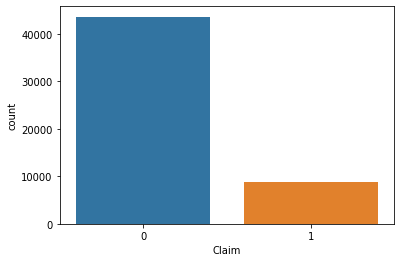

In [ ]:
sns.countplot(train['Claim'])
plt.show()

In [ ]:
# Rows containing duplicate data
df_train= train.drop(['ID'],axis=1)
print("Traing data shape is ", df_train.shape)

df_train.drop_duplicates(keep=False,inplace=True) 
print("Training data shape after duplicate removed is  ", df_train.shape)

df_test= test.drop(['ID'],axis=1)
print("Testing data shape is ", df_test.shape)

df_test.drop_duplicates(keep=False,inplace=True) 
print("Testing data shape after duplicate removed is  ", df_test.shape)


#duplicate_rows_df = duplicate_rows_df[duplicate_rows_df.duplicated()]
#print("number of duplicate rows: ", duplicate_rows_df.shape)


# Dropping the duplicates 
#df = duplicate_rows_df.drop_duplicates()
#print("number of duplicate rows: ", df.shape)
#df.head(5)

Traing data shape is  (52310, 10)
Training data shape after duplicate removed is   (43060, 10)
Testing data shape is  (22421, 9)
Testing data shape after duplicate removed is   (19644, 9)


In [ ]:
len(train['ID'].unique())

7992

In [ ]:
len(test['ID'].unique())

8226

In [ ]:
for column in train.columns:
  print("Column name is ",column)
  print(train[column].sort_values().unique())
  print(len(train[column].unique()))
  print("****************************************************************************************************")

Column name is  ID
[ 2000  2001  2002 ...  9998  9999 10000]
7992
****************************************************************************************************
Column name is  Agency
['ADM' 'ART' 'C2B' 'CBH' 'CCR' 'CSR' 'CWT' 'EPX' 'JWT' 'JZI' 'KML' 'LWC'
 'RAB' 'SSI' 'TST' 'TTW']
16
****************************************************************************************************
Column name is  Agency Type
['Airlines' 'Travel Agency']
2
****************************************************************************************************
Column name is  Distribution Channel
['Offline' 'Online']
2
****************************************************************************************************
Column name is  Product Name
['1 way Comprehensive Plan' '2 way Comprehensive Plan' '24 Protect'
 'Annual Gold Plan' 'Annual Silver Plan' 'Annual Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Annual Travel Protect Silver'
 'Basic Plan' 'Bronze Plan' 'Cancellation Plan' 'Child

In [ ]:
len(train[(train['Duration']<0) | (train['Duration']>500)])

20

In [ ]:
train[train['Net Sales']<0].head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
104,9734,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81,UNITED KINGDOM,-128.7,77.22,63,0
147,7747,EPX,Travel Agency,Online,Cancellation Plan,15,CANADA,-17.0,0.00,24,0
190,8778,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,178,AUSTRALIA,-69.3,41.58,29,0
485,9677,C2B,Airlines,Online,Annual Silver Plan,364,SINGAPORE,-389.0,97.25,27,0
587,5675,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,31,JAPAN,-69.3,41.58,26,0


In [ ]:
train[train['Commision (in value)']<0].head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [ ]:
train[train['Duration']==0].head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1270,2274,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,0.51,0.14,48,0
1363,2359,C2B,Airlines,Online,Bronze Plan,0,SINGAPORE,27.00,6.75,23,0
2081,3412,JWT,Airlines,Online,Value Plan,0,INDIA,62.00,24.80,118,0
3191,7964,JWT,Airlines,Online,Value Plan,0,INDIA,31.00,12.40,118,0
7706,7433,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,14.40,4.04,48,0


In [ ]:
train[train['Duration']<0].head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11523,9450,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,7015,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,4193,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,7763,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


In [ ]:
train[train['Duration']>1000].head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
382,9512,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,0
7766,4113,SSI,Airlines,Online,Ticket Protector,4831,SINGAPORE,0.32,0.09,48,0
14544,3927,SSI,Airlines,Online,Ticket Protector,4847,SINGAPORE,0.32,0.09,48,0
22123,3165,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,0
31985,5697,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,0


In [ ]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(train.select_dtypes(include=numerics).columns)
df_numeric=train.loc[:,numerical_vars]

# to generate categorical value
df_category=train.drop(numerical_vars,axis=1)

ID


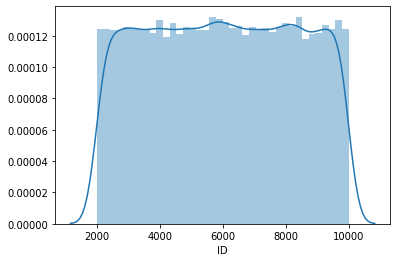

Duration


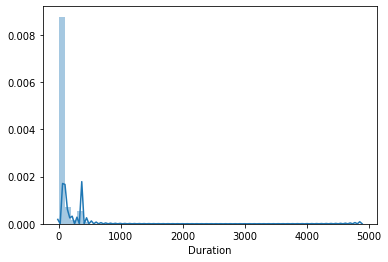

Net Sales


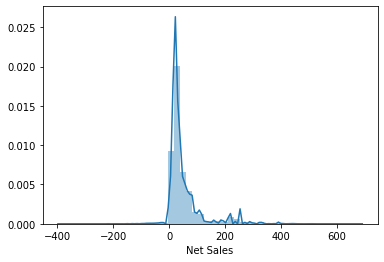

Commision (in value)


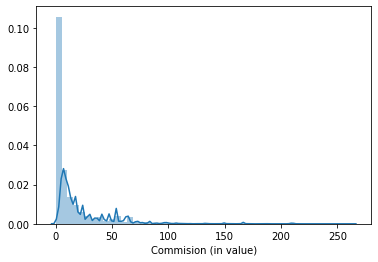

Age


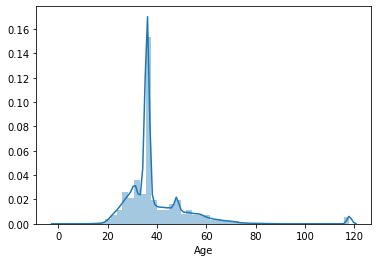

Claim


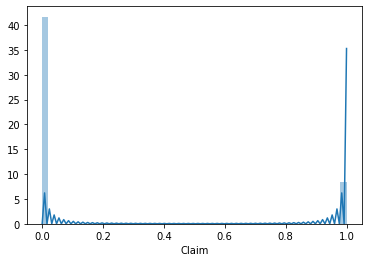

In [ ]:
# to check the data distribution in numerical values
for i in df_numeric.columns:
  print(i)
  sns.distplot(df_numeric[i])
  plt.show()

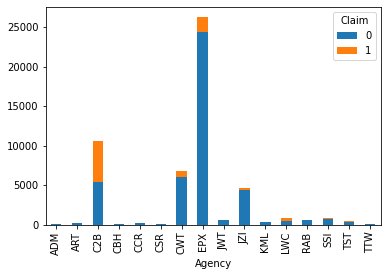

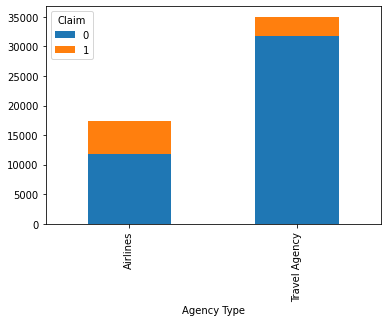

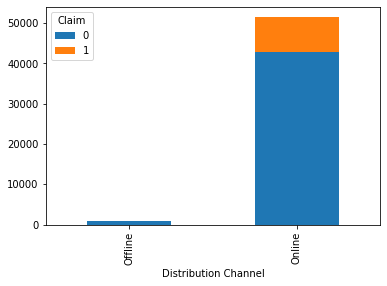

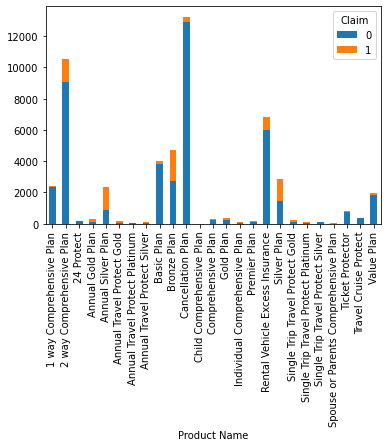

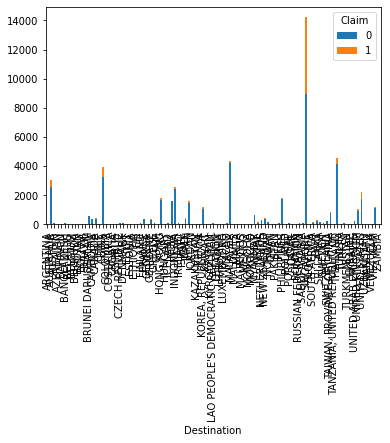

In [ ]:
# to check the data distribution in categorical values
for i in df_category.columns:
  #print("Column name is ",i)
  train.groupby(i)['Claim'].value_counts().unstack().plot(kind='bar',stacked=True)

ID


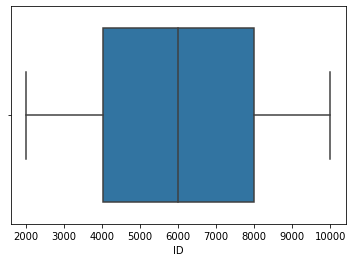

Duration


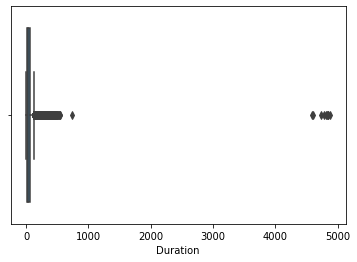

Net Sales


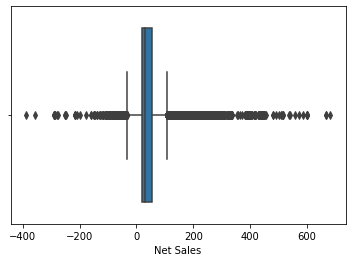

Commision (in value)


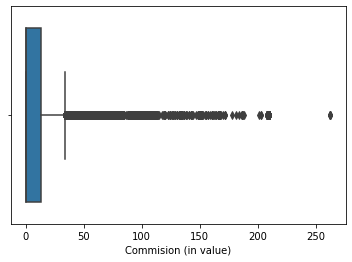

Age


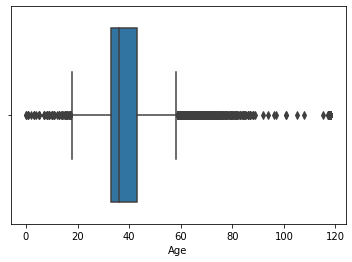

Claim


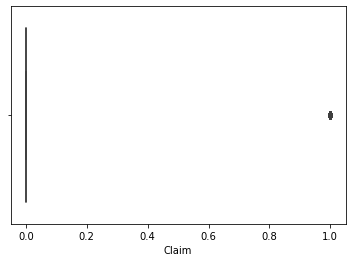

In [ ]:
# to check the data distribution in numerical values
for i in df_numeric.columns:
  print(i)
  sns.boxplot(df_numeric[i])
  plt.show()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
ID,1.000000,0.000355,0.004268,0.004822,-0.003083,0.006393
Duration,0.000355,1.000000,0.595261,0.483148,-0.003969,0.201583
Net Sales,0.004268,0.595261,1.000000,0.733110,0.022606,0.326799
Commision (in value),0.004822,0.483148,0.733110,1.000000,0.087455,0.258688
Age,-0.003083,-0.003969,0.022606,0.087455,1.000000,-0.060228
Claim,0.006393,0.201583,0.326799,0.258688,-0.060228,1.000000


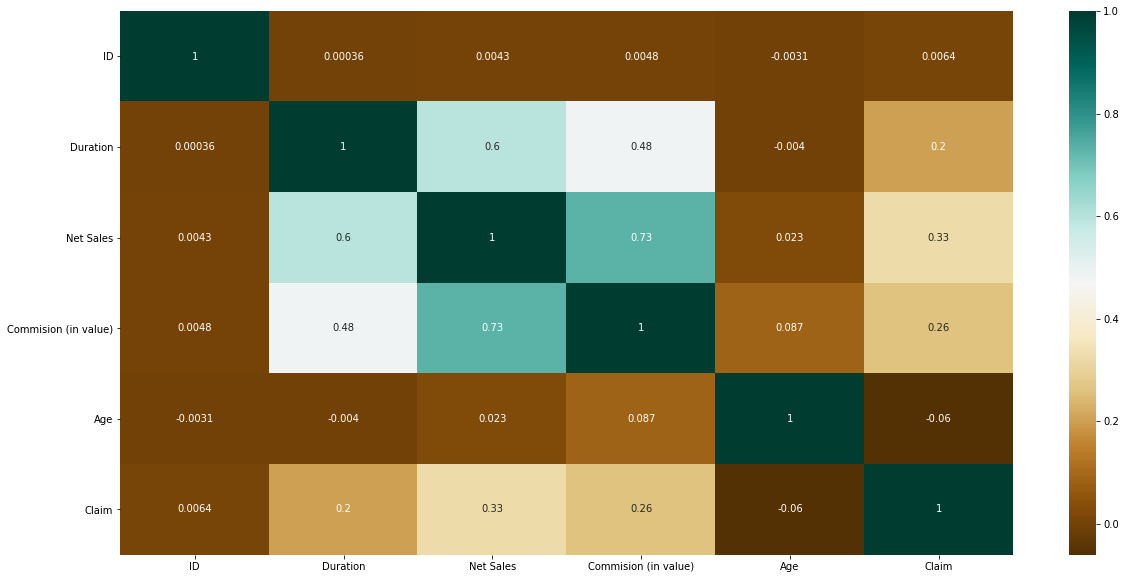

In [ ]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
for column in test.columns:
  print("Column name is ",column)
  print(test[column].sort_values().unique())
  print(len(test[column].unique()))
  print("****************************************************************************************************")

Column name is  ID
[11000 11001 11002 ... 19998 19999 20000]
8226
****************************************************************************************************
Column name is  Agency
['ADM' 'ART' 'C2B' 'CBH' 'CCR' 'CSR' 'CWT' 'EPX' 'JWT' 'JZI' 'KML' 'LWC'
 'RAB' 'SSI' 'TST' 'TTW']
16
****************************************************************************************************
Column name is  Agency Type
['Airlines' 'Travel Agency']
2
****************************************************************************************************
Column name is  Distribution Channel
['Offline' 'Online']
2
****************************************************************************************************
Column name is  Product Name
['1 way Comprehensive Plan' '2 way Comprehensive Plan' '24 Protect'
 'Annual Gold Plan' 'Annual Silver Plan' 'Annual Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Annual Travel Protect Silver'
 'Basic Plan' 'Bronze Plan' 'Cancellation Plan' 'Child

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas_profiling as pp 
# forming ProfileReport and save 
# as output.html file 
profile = pp.ProfileReport(train) 
profile.to_file("output.html")

In [ ]:
pip install sweetviz

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(train)
#display the report
advert_report.show_html('Advertising.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report Advertising.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
!pip install pycountry_convert

In [ ]:
df1 = sv.compare(train[100:], train[:100])
df1.show_html('Compare.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report Compare.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

In [ ]:
!pip install pycountry_convert

## to convert contries to continent

In [ ]:
import pycountry_convert as pc
import re

def contry_to_continent(name):
    country_code = pc.country_name_to_country_alpha2(name, cn_name_format="default")
    return pc.country_alpha2_to_continent_code(country_code)

def snake_to_camel(word):
    return ' '.join(x.capitalize() or ' ' for x in word.split(' '))


In [ ]:
train['Destination']=train['Destination'].str.partition(',')
train['Destination']=train['Destination'].apply(lambda x: snake_to_camel(x))
train['Destination'].replace(to_replace="Korea",value="South Korea",inplace=True)
train['Destination_continent']=train['Destination'].apply(lambda x: contry_to_continent(x))

In [ ]:
test['Destination']=test['Destination'].str.partition(',')
test['Destination']=test['Destination'].apply(lambda x: snake_to_camel(x))
test['Destination'].replace(to_replace="Korea",value="South Korea",inplace=True)
test['Destination_continent']=test['Destination'].apply(lambda x: contry_to_continent(x))

In [ ]:
train['Destination_continent'].value_counts(normalize=True)

AS    0.805142
EU    0.072759
OC    0.065227
NA    0.050124
AF    0.004263
SA    0.002485
Name: Destination_continent, dtype: float64

In [ ]:
test['Destination_continent'].value_counts(normalize=True)

AS    0.804514
EU    0.074439
OC    0.065028
NA    0.048348
AF    0.004862
SA    0.002810
Name: Destination_continent, dtype: float64

In [ ]:
train['Agency'].value_counts(normalize=True)# We can make others in Agency name for less 1% data

EPX    0.501204
C2B    0.202925
CWT    0.130243
JZI    0.088301
LWC    0.015408
SSI    0.014911
JWT    0.010514
RAB    0.010075
TST    0.007532
KML    0.005984
ART    0.004263
CCR    0.002982
TTW    0.001988
CBH    0.001453
CSR    0.001147
ADM    0.001071
Name: Agency, dtype: float64

In [ ]:
test['Agency'].value_counts()# We can make others in Agency name for less 1% data

EPX    11260
C2B     4538
CWT     2879
JZI     2032
SSI      356
LWC      330
JWT      242
RAB      198
TST      161
KML      143
ART      105
CCR       54
TTW       46
CSR       26
ADM       26
CBH       25
Name: Agency, dtype: int64

In [ ]:
agency_list=train.groupby('Agency')['Agency'].agg('count').sort_values(ascending=False)
top_agency=agency_list[agency_list>500]
train['Agency']=train['Agency'].apply(lambda x: x if x in top_agency else 'OTHER')
train['Agency'].value_counts(normalize=True)

EPX      0.501204
C2B      0.202925
CWT      0.130243
JZI      0.088301
OTHER    0.026419
LWC      0.015408
SSI      0.014911
JWT      0.010514
RAB      0.010075
Name: Agency, dtype: float64

In [ ]:
agency_list=test.groupby('Agency')['Agency'].agg('count').sort_values(ascending=False)
top_agency=agency_list[agency_list>190]
test['Agency']=test['Agency'].apply(lambda x: x if x in top_agency else 'OTHER')
test['Agency'].value_counts(normalize=True)

EPX      0.502208
C2B      0.202400
CWT      0.128406
JZI      0.090629
OTHER    0.026136
SSI      0.015878
LWC      0.014718
JWT      0.010793
RAB      0.008831
Name: Agency, dtype: float64

In [ ]:
train['Product Name'].value_counts(normalize=True)# We can make others in Agency name for less 1% data
# check the plans relations

Cancellation Plan                       0.253374
2 way Comprehensive Plan                0.201778
Rental Vehicle Excess Insurance         0.130243
Bronze Plan                             0.090289
Basic Plan                              0.077270
Silver Plan                             0.054712
1 way Comprehensive Plan                0.046052
Annual Silver Plan                      0.044886
Value Plan                              0.037488
Ticket Protector                        0.014911
Travel Cruise Protect                   0.007532
Gold Plan                               0.007264
Annual Gold Plan                        0.005639
Comprehensive Plan                      0.005314
Single Trip Travel Protect Gold         0.004798
Annual Travel Protect Gold              0.003498
24 Protect                              0.003154
Premier Plan                            0.002695
Single Trip Travel Protect Silver       0.002485
Single Trip Travel Protect Platinum     0.001912
Annual Travel Protec

In [ ]:
test['Product Name'].value_counts(normalize=True)# We can make others in Agency name for less 1% data


Cancellation Plan                       0.257749
2 way Comprehensive Plan                0.199634
Rental Vehicle Excess Insurance         0.128406
Bronze Plan                             0.088578
Basic Plan                              0.077695
Silver Plan                             0.054146
Annual Silver Plan                      0.046207
1 way Comprehensive Plan                0.044824
Value Plan                              0.039204
Ticket Protector                        0.015878
Travel Cruise Protect                   0.007181
Gold Plan                               0.006913
Annual Gold Plan                        0.006423
Single Trip Travel Protect Gold         0.005129
Comprehensive Plan                      0.004549
24 Protect                              0.003523
Annual Travel Protect Gold              0.003122
Single Trip Travel Protect Silver       0.002676
Premier Plan                            0.002319
Individual Comprehensive Plan           0.001873
Single Trip Travel P

In [ ]:
product_list=train.groupby('Product Name')['Product Name'].agg('count').sort_values(ascending=False)
top_product=product_list[product_list>500]
train['Product Name']=train['Product Name'].apply(lambda x: x if x in top_product else 'OTHER')
train['Product Name'].value_counts(normalize=True)

Cancellation Plan                  0.253374
2 way Comprehensive Plan           0.201778
Rental Vehicle Excess Insurance    0.130243
Bronze Plan                        0.090289
Basic Plan                         0.077270
Silver Plan                        0.054712
OTHER                              0.048996
1 way Comprehensive Plan           0.046052
Annual Silver Plan                 0.044886
Value Plan                         0.037488
Ticket Protector                   0.014911
Name: Product Name, dtype: float64

In [ ]:
product_list=test.groupby('Product Name')['Product Name'].agg('count').sort_values(ascending=False)
top_product=product_list[product_list>350]
test['Product Name']=test['Product Name'].apply(lambda x: x if x in top_product else 'OTHER')
test['Product Name'].value_counts(normalize=True)

Cancellation Plan                  0.257749
2 way Comprehensive Plan           0.199634
Rental Vehicle Excess Insurance    0.128406
Bronze Plan                        0.088578
Basic Plan                         0.077695
Silver Plan                        0.054146
OTHER                              0.047679
Annual Silver Plan                 0.046207
1 way Comprehensive Plan           0.044824
Value Plan                         0.039204
Ticket Protector                   0.015878
Name: Product Name, dtype: float64

In [ ]:
train['Destination'].value_counts(normalize=True)# make data continent wise

Singapore       0.272262
Thailand        0.087211
Malaysia        0.083330
China           0.074728
Australia       0.057561
                  ...   
Belarus         0.000038
Bermuda         0.000038
Bhutan          0.000038
Zambia          0.000019
Turkmenistan    0.000019
Name: Destination, Length: 97, dtype: float64

In [ ]:
train['Age'].value_counts(normalize=True)# group wise by 4 parts

36    0.343701
31    0.043663
35    0.037947
48    0.034850
30    0.026209
        ...   
4     0.000019
96    0.000019
92    0.000019
94    0.000019
2     0.000019
Name: Age, Length: 99, dtype: float64

In [ ]:
train['Age_window']=pd.cut(train.Age,bins=[0,31,61,91,120],labels=['0-30','31-60','61-90','91-120'])
train['Age_window']=train['Age_window'].astype('object')
train['Age_window'].value_counts(normalize=True).sort_values()

91-120    0.014166
61-90     0.037547
0-30      0.210236
31-60     0.738052
Name: Age_window, dtype: float64

In [ ]:
test['Age_window']=pd.cut(test.Age,bins=[0,31,61,91,120],labels=['0-30','31-60','61-90','91-120'])
test['Age_window']=test['Age_window'].astype('object')
test['Age_window'].value_counts(normalize=True).sort_values()

91-120    0.014897
61-90     0.040052
0-30      0.201998
31-60     0.743053
Name: Age_window, dtype: float64

In [ ]:
train['Duration'].value_counts(normalize=True)# Negative values should be chamged to zero

5       0.031027
6       0.030835
8       0.029593
7       0.029210
10      0.028752
          ...   
434     0.000019
529     0.000019
497     0.000019
4580    0.000019
436     0.000019
Name: Duration, Length: 439, dtype: float64

In [ ]:
train['Duration'].replace(-2,0,inplace=True)
train['Duration'].replace(-1,0,inplace=True)
## what is significance of this column

In [ ]:
test['Duration'].replace(-2,0,inplace=True)
test['Duration'].replace(-1,0,inplace=True)
## what is significance of this column

In [ ]:
train.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim', 'Destination_continent', 'Age_window'],
      dtype='object')

In [ ]:
train[(train['Net Sales']<=0) & (train['Commision (in value)']>0)].head()
## we have to do net sales  and commision 0 when sales is less than and equal to zero

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Destination_continent,Age_window
33,6138,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,4,Thailand,0.0,17.82,30,0,AS,0-30
62,5266,C2B,Airlines,Online,Bronze Plan,77,Singapore,0.0,15.00,28,0,AS,0-30
104,9734,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81,United Kingdom,-128.7,77.22,63,0,EU,61-90
120,3642,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,Malaysia,0.0,11.88,62,0,AS,61-90
125,9233,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,Germany,0.0,47.52,39,0,EU,31-60


In [ ]:
train['Net Sales']=train['Net Sales'].apply(lambda x: 0 if x<0 else x)
test['Net Sales']=test['Net Sales'].apply(lambda x: 0 if x<0 else x)

In [ ]:
#train['Commision (in value)']=train.loc[:,['Commision (in value)','Net Sales']].apply(lambda x,y: 0 if y==0 else x)
train.loc[train['Net Sales']==0,'Commision (in value)']=0
test.loc[test['Net Sales']==0,'Commision (in value)']=0

In [ ]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Destination_continent,Age_window
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,Hong Kong,18.0,0.00,36,AS,31-60
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,Singapore,20.0,0.00,36,AS,31-60
2,14139,C2B,Airlines,Online,Bronze Plan,13,Singapore,13.5,3.38,24,AS,0-30
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,Taiwan,41.0,0.00,36,AS,31-60
4,16439,C2B,Airlines,Online,Silver Plan,2,Singapore,30.0,7.50,32,AS,31-60


In [ ]:
X=train.drop(['ID','Destination','Age','Claim'],axis=1)
#df=train.drop(['ID','Destination','Age'],axis=1)
X_test=test.drop(['ID','Destination','Age'],axis=1)
y=train['Claim']

In [ ]:
!pip install pycaret==2.0

In [ ]:
from pycaret.utils import enable_colab 
enable_colab() 
import pandas as pd
#pycaret_data=pd.read_csv('/content/train.csv') 
#pycaret_data.drop(['ID'],axis=1,inplace=True)
from pycaret.classification import * 
exp_clf101 = setup(data = df,
                   target = 'Claim', 
                   remove_outliers=True,
                   normalize=True,
                   transformation=True,
                   pca=True,
                   polynomial_features=True,
                   #fix_imbalance=True,
                   #fix_imbalance_method='smote',
                   session_id=123)  

In [ ]:
compare_models()

In [ ]:
print(X.shape)
print(X_test.shape)
print(y.shape)

(52310, 9)
(22421, 9)
(52310,)


In [ ]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Net Sales', 'Commision (in value)',
       'Destination_continent', 'Age_window'],
      dtype='object')

In [ ]:
X_test.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Net Sales', 'Commision (in value)',
       'Destination_continent', 'Age_window'],
      dtype='object')

In [ ]:
for i in ['Agency','Agency Type','Distribution Channel','Product Name','Destination_continent','Age_window']:
  X_Dummy=pd.get_dummies(X[i],prefix=i,drop_first=True)
  X = pd.concat([X,X_Dummy], axis=1)
  X.drop([i],axis=1,inplace=True)

In [ ]:
for i in ['Agency','Agency Type','Distribution Channel','Product Name','Destination_continent','Age_window']:
  X_Dummy=pd.get_dummies(X_test[i],prefix=i,drop_first=True)
  X_test = pd.concat([X_test,X_Dummy], axis=1)
  X_test.drop([i],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_new = scaler.transform(X)
X_test_new = scaler.transform(X_test)

In [ ]:
print(X.shape)
print(X_test.shape)
print(y.shape)

(52310, 31)
(22421, 31)
(52310,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

def accuracy_check(model,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', n_jobs=-1, cv=10)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("score is                           ", model.score(X_test,y_test))
  print('Cross-validation mean accuracy is ',np.mean(scores) * 100)
  print('Standard deviation of accuracy is ',np.std(scores) * 100,".")
  print('Accuracy score of Model is        ',accuracy_score(y_test,y_pred))
  print('Precision score of model is       ',precision_score(y_test,y_pred,average='weighted'))
  print('Recall score of model is          ',recall_score(y_test,y_pred,average='weighted'))
  print('F1 score of model is              ',f1_score(y_test,y_pred,average='weighted'))
  print('ROC AUC score is                  ',roc_auc_score(y_test,y_pred,average='weighted'))
  matrix=pd.DataFrame(confusion_matrix(y_test,y_pred),index=[['actual', 'actual'], ['spam', 'ham']],columns=[['predicted', 'predicted'], ['spam', 'ham']])
  print(matrix)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
accuracy_check(model,X_new,y)

score is                            0.9192633658318996
Cross-validation mean accuracy is  91.5558238483157
Standard deviation of accuracy is  0.4579333321863067 .
Accuracy score of Model is         0.9192633658318996
Precision score of model is        0.9165843593548679
Recall score of model is           0.9192633658318996
F1 score of model is               0.9174685105871694
ROC AUC score is                   0.8337595513078891
            predicted      
                 spam   ham
actual spam     12583   498
       ham        769  1843


In [ ]:
model.fit(X_new,y)
pred=model.predict(X_test)


In [ ]:
df_pred=pd.DataFrame(pred)
df_pred.columns=['Claim']
df_pred.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [ ]:
sample.head()
sample['Claim']=df_pred['Claim']
sample.to_csv("sub.csv",index=False)

In [ ]:
model=RandomForestClassifier()
accuracy_check(model,X_new,y)

In [ ]:
model=KNeighborsClassifier(n_neighbors=2)
accuracy_check(model,X_new,y)

In [ ]:
model=AdaBoostClassifier(RandomForestClassifier(),learning_rate=0.1,n_estimators=50)
accuracy_check(model,X_new,y)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,2,3,4,5,6],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1000,1500,2000,2100,2200,2300,2400,2500],
            'n_jobs':[-1]
        }
    },
    'KNeighborsClassifier': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[2,3,4,5,6]
        }
    },
    'Bagging':{
        'model':BaggingClassifier(DecisionTreeClassifier()),
        'params': {
            'n_estimators':[500,1000,1500,2000,2100],
            'max_samples':[100,200,300,400],
            'bootstrap':[True,False],
            'n_jobs':[-1]            
        }
    },
    'Adaboost':{
        'model': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
        'params': {
            'n_estimators':[500,1000,1500,2000,2100],
            'algorithm':["SAMME.R"],
            'learning_rate':[0.1,0.2,0.3,0.01],
            
        }
    }

}


In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_new, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
train1 = pd.concat([train,y],axis =1)
train1.drop(columns = 'Claim',inplace =True)
train1 = pd.concat([train1,y],axis =1)
pred= pd.DataFrame(pred)
test1=pd.concat([test,pred],axis =1)
test1 = test1.rename(columns={0:'Claim'})

In [ ]:
print(train1.shape)
print(test1.shape)

(52310, 13)
(22421, 13)


In [ ]:
data_combined =  pd.concat([train1,test1],axis =0)

In [ ]:
data_combined.shape

(74731, 13)

In [ ]:
data_combined=data_combined.replace({'Destination_continent' : { 'AF' : 'Africa', 'SA' : 'South America', 'EU' : 'Europe', 'NA' : 'North America', 'OC' : 'Oceania' , 'AS' : 'Asia'}})

In [ ]:
data_combined['Destination_continent'].value_counts(normalize=True)

Asia             0.804954
Europe           0.073263
Oceania          0.065167
North America    0.049591
Africa           0.004443
South America    0.002583
Name: Destination_continent, dtype: float64

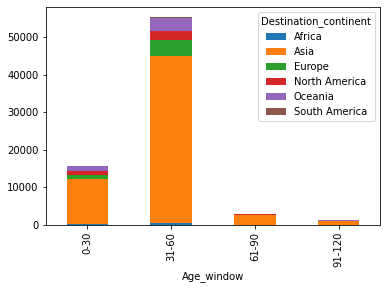

In [ ]:
data_combined.groupby('Age_window')['Destination_continent'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.show()

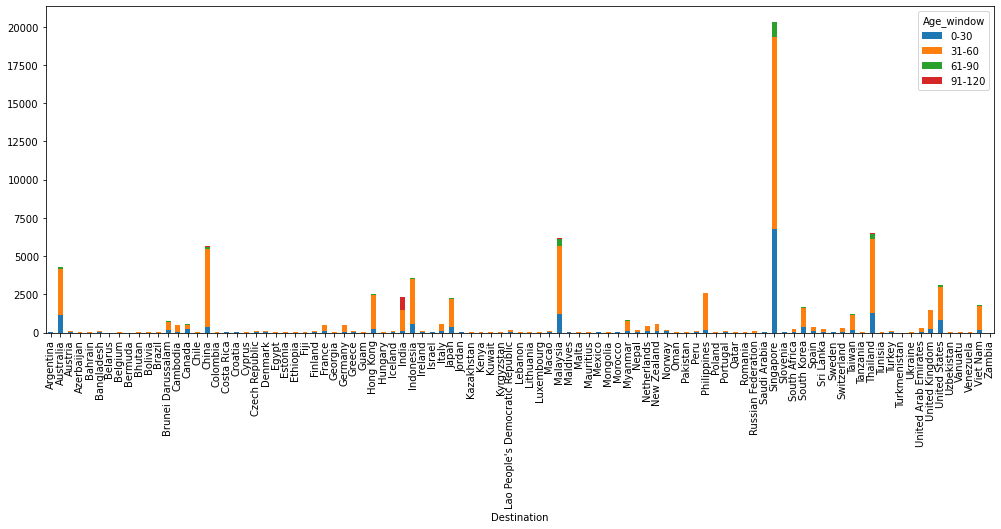

In [ ]:
data_combined.groupby('Destination')['Age_window'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(17,6))
#plt.legend(frameon=True)
plt.show()

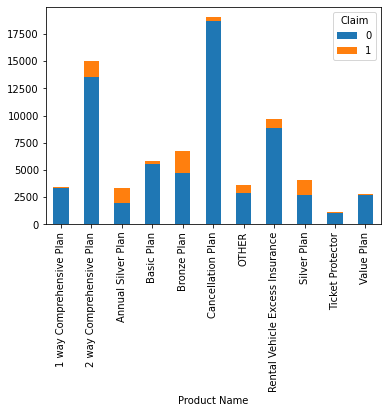

In [ ]:
data_combined.groupby(['Product Name'],sort=True)['Claim'].value_counts().unstack().plot(kind='bar',stacked=True)

In [ ]:
Products_stats = data_combined.groupby(['Product Name','Claim'],sort=True,as_index=False).agg('count').iloc[:,:3]
Products_stats.rename(columns={'ID':'Count'},inplace=True)
len = data_combined['ID'].count()
Products_stats['Claim_Proportion'] = Products_stats['Count']/len*100
Max_Claim_Product = Products_stats[Products_stats['Claim']==1].sort_values(by='Claim_Proportion',ascending = False).iloc[0,:]
print("The Product with the Maximum Claim Ratio : " + Max_Claim_Product['Product Name'])

The Product with the Maximum Claim Ratio : Bronze Plan


In [ ]:
data_combined['Product Name'].unique()

array(['Cancellation Plan', 'Rental Vehicle Excess Insurance',
       '2 way Comprehensive Plan', 'Basic Plan', 'Bronze Plan',
       'Silver Plan', '1 way Comprehensive Plan', 'Value Plan',
       'Annual Silver Plan', 'OTHER', 'Ticket Protector'], dtype=object)

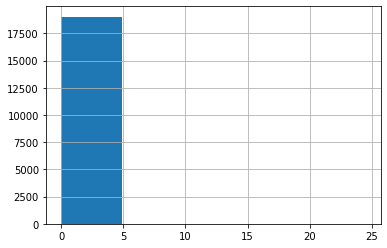

In [ ]:
data_combined[data_combined['Product Name'] == 'Cancellation Plan']['Commision (in value)'].hist(bins = 5)

Cancellation Plan


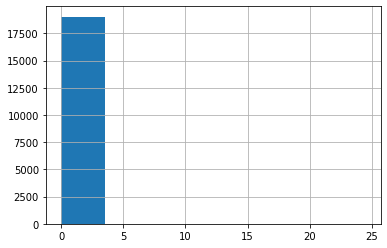

Rental Vehicle Excess Insurance


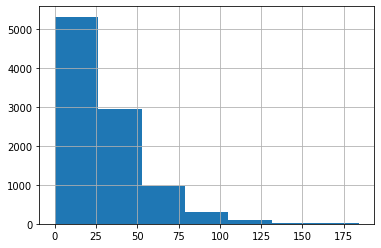

2 way Comprehensive Plan


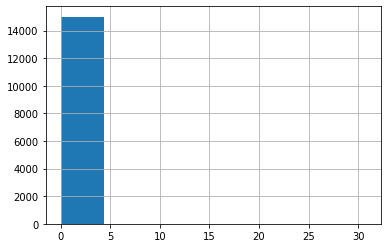

Basic Plan


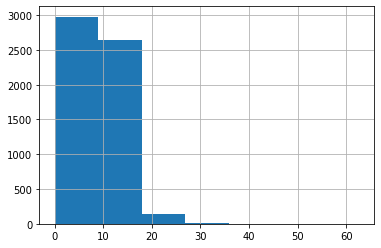

Bronze Plan


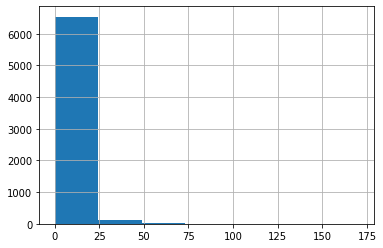

Silver Plan


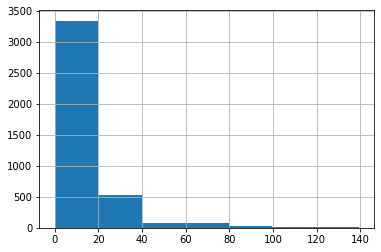

1 way Comprehensive Plan


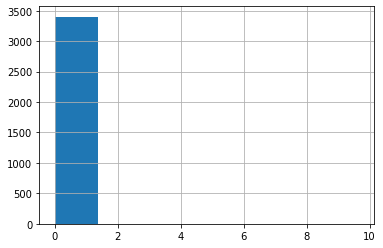

Value Plan


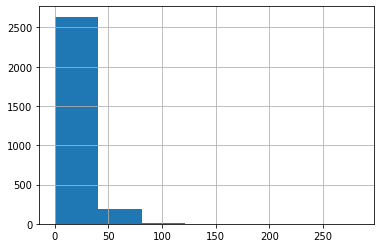

Annual Silver Plan


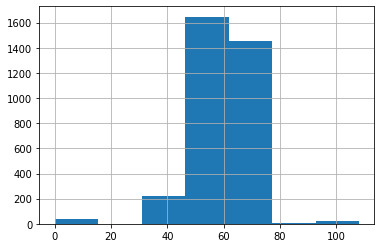

OTHER


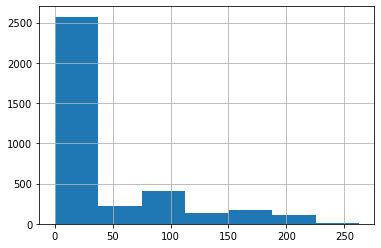

Ticket Protector


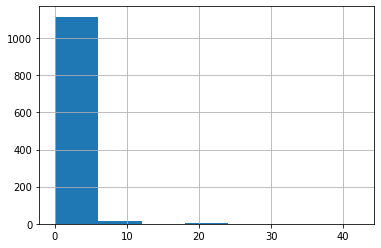

In [ ]:
for i in data_combined['Product Name'].unique():
  print(i)
  data_combined[data_combined['Product Name'] == i]['Commision (in value)'].hist(bins = 7)
  plt.show()

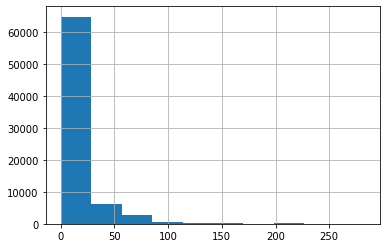

In [ ]:
data_combined['Commision (in value)'].hist()
plt.show()

In [ ]:
Products_Commission_stats = data_combined.groupby(['Product Name'],as_index=False)['Commision (in value)'].sum().sort_values(by ='Commision (in value)',ascending = False)
Max_Commission_EArned_Product = Products_Commission_stats.iloc[0]
print("The Product where Maximum Commission was earned : " + Max_Commission_EArned_Product['Product Name'])

The Product where Maximum Commission was earned : Rental Vehicle Excess Insurance


In [ ]:
Products_Commission_stats

,Product Name,Commision (in value)
7,Rental Vehicle Excess Insurance,282357.405620
2,Annual Silver Plan,192896.938799
6,OTHER,157428.793190
8,Silver Plan,61224.001010
4,Bronze Plan,59601.992795
3,Basic Plan,54158.316556
10,Value Plan,51722.919611
9,Ticket Protector,2084.777841
1,2 way Comprehensive Plan,435.773809
5,Cancellation Plan,130.954791


In [ ]:
data_combined.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Destination_continent', 'Age_window', 'Claim'],
      dtype='object')

In [ ]:
import pycountry_convert as pc

def contry_to_country_code(name):
    return pc.country_name_to_country_alpha3(name, cn_name_format="default")


In [ ]:
data_combined['Country_Code']=data_combined['Destination'].apply(lambda x: contry_to_country_code(x))
#data_combined['Continent_Code']=data_combined['Destination'].apply(lambda x: contry_to_continent(x))
Contry_Travel_Stats = data_combined.groupby(['Destination','Country_Code','Destination_continent'],as_index=False).count().sort_values(by ='Country_Code',ascending = False).iloc[:,:4]
Contry_Travel_Stats.rename(columns={'ID':'Count'},inplace=True)

In [ ]:
Contry_Travel_Stats

,Destination,Country_Code,Destination_continent,Count
96,Zambia,ZMB,Africa,3
76,South Africa,ZAF,Africa,227
93,Vanuatu,VUT,Oceania,5
95,Viet Nam,VNM,Asia,1778
94,Venezuela,VEN,South America,5
...,...,...,...,...
3,Azerbaijan,AZE,Asia,8
2,Austria,AUT,Europe,102
1,Australia,AUS,Oceania,4294
0,Argentina,ARG,South America,22


In [ ]:
import plotly.express as px
df = Contry_Travel_Stats.copy()
fig = px.scatter_geo(df, locations="Country_Code",color="Destination",
                     hover_name="Destination", size=df.Count, size_max=75,projection='natural earth')

fig.update_layout({
    'geo': {
        'resolution': 50
    }
})

fig.show()

In [ ]:
data_combined.groupby(['Destination','Country_Code','Destination_continent'],as_index=False)['Age'].agg(lambda x:x.value_counts().index[0]).to_csv("sub.csv",index=False)

In [ ]:
data_combined.groupby(['Destination','Country_Code','Destination_continent'],as_index=False)['Age'].mean()

,Destination,Country_Code,Destination_continent,Age
0,Argentina,ARG,South America,35.954545
1,Australia,AUS,Oceania,39.570098
2,Austria,AUT,Europe,36.892157
3,Azerbaijan,AZE,Asia,34.625000
4,Bahrain,BHR,Asia,39.307692
...,...,...,...,...
92,Uzbekistan,UZB,Asia,36.300000
93,Vanuatu,VUT,Oceania,36.400000
94,Venezuela,VEN,South America,35.600000
95,Viet Nam,VNM,Asia,38.648481


In [ ]:
Contry_Travel_Stats = data_combined.groupby(['Destination','Country_Code','Destination_continent'],as_index=False).count().sort_values(by ='Country_Code',ascending = False).iloc[:,:4]
Contry_Travel_Stats.rename(columns={'ID':'Count'},inplace=True)

In [ ]:
Subset=data_combined[data_combined['Claim'] ==1].copy()
county_claim_stats = Subset.groupby(['Destination','Country_Code','Destination_continent'],as_index=False).count().sort_values(by ='Country_Code',ascending = False).iloc[:,:4]
county_claim_stats.rename(columns={'ID':'Count'},inplace=True)

In [ ]:
import plotly.express as px
df = county_claim_stats.copy()
fig = px.scatter_geo(df, locations="Country_Code",color="Destination",
                     hover_name="Destination", size=df.Count, size_max=70,projection='natural earth')
fig.update_layout({
    'geo': {
        'resolution': 50
    }
})
fig.show()

In [ ]:
df = county_claim_stats.copy()
fig1 = px.choropleth(df, locations="Country_Code",
                    color="Count", # lifeExp is a column of gapminder
                    hover_name="Destination", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,range_color=(0,500),projection='natural earth')
                    #tickvals = [0,50,100,500,1000,5000])
fig1.update_layout({
    'geo': {
        'resolution': 50
    }
})


fig1.show()